In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
real_x=data.iloc[:,[2,3]].values
real_y=data.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split   #library

In [6]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0)
training_x

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
#feature scaling
#features scaling"""
scalar=StandardScaler()
training_x=scalar.fit_transform(training_x)
test_x=scalar.fit_transform(test_x) # output y is not included because it contain only 1 or 0

In [10]:
from sklearn.svm import SVC

In [31]:
s_vc=SVC(kernel= 'linear',random_state=0)
s_vc.fit(training_x,training_y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
ypred=s_vc.predict(test_x)
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
cls=confusion_matrix(test_y,ypred)
cls

array([[63,  5],
       [ 7, 25]], dtype=int64)

In [19]:
from matplotlib.colors import ListedColormap

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'camp'
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


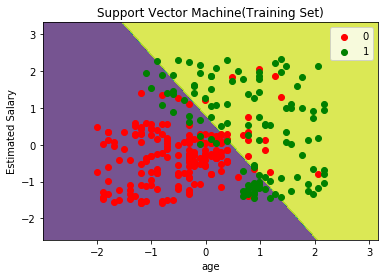

In [21]:


x_set,y_set=training_x,training_y
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,s_vc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,camp=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Support Vector Machine(Training Set)')
plt.xlabel('age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

                  

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'camp'
  import sys
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


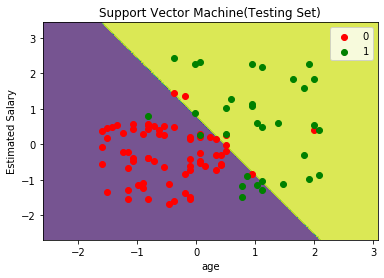

In [22]:
#from matplotlib.colors import ListedColormap

x_set,y_set=test_x,test_y
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,s_vc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,camp=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Support Vector Machine(Testing Set)')
plt.xlabel('age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

                  